<a href="https://colab.research.google.com/github/Subashinimuralikrishnan/Chronic-Kidney-Disease-Prediction/blob/main/Chronic_Kidney_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px #plots especially for eda
import warnings as w
w.filterwarnings('ignore')

plt.style.use('fivethirtyeight') #standard design for plots
%matplotlib inline
#for inline view of plots
pd.set_option('display.max_columns',26)

In [ ]:
df=pd.read_csv('./kidney_disease.csv')
df.head()#top5 rows

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.drop('id',axis=1,inplace=True)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


As we can see that all columns are not displayed since they are not in nummerical format, We need to change them into numerical data type to get all features as numerical for computations

In [ ]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
df['age'].dtype


dtype('float64')

In [ ]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


**Changed to Numerical Values**
As we can see that after converting to numerical data type, now the analysis of the specific column is displayed

In [ ]:
obj_cols=[c for c in df.columns if df[c].dtype=='object']
num_cols=[c for c in df.columns if df[c].dtype!='object']

seperating the objects and numericals to seperate lists


In [ ]:
for col in obj_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [ ]:
print([list(map(ord, x)) for x in df['class'].unique() if isinstance(x, str)])

[[99, 107, 100], [99, 107, 100, 9], [110, 111, 116, 99, 107, 100]]


displaying unique values


In [ ]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = 'ckd\t',value='ckd')
df['class']=df['class'].replace(to_replace='notckd',value= 'not ckd')
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,not ckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no,not ckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no,not ckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no,not ckd


In [ ]:
df['class']=df['class'].map({'ckd':0,'not ckd':1})
#df['class']=pd.to_numeric(df['class'],errors='coerce')
df['class'].unique()

array([0, 1])

**Changed the values of Output Parameters**


*   Chronic Kidney Disease(ckd) - 0
*   Not a Chronic Kidney Disease(nckd) - 1



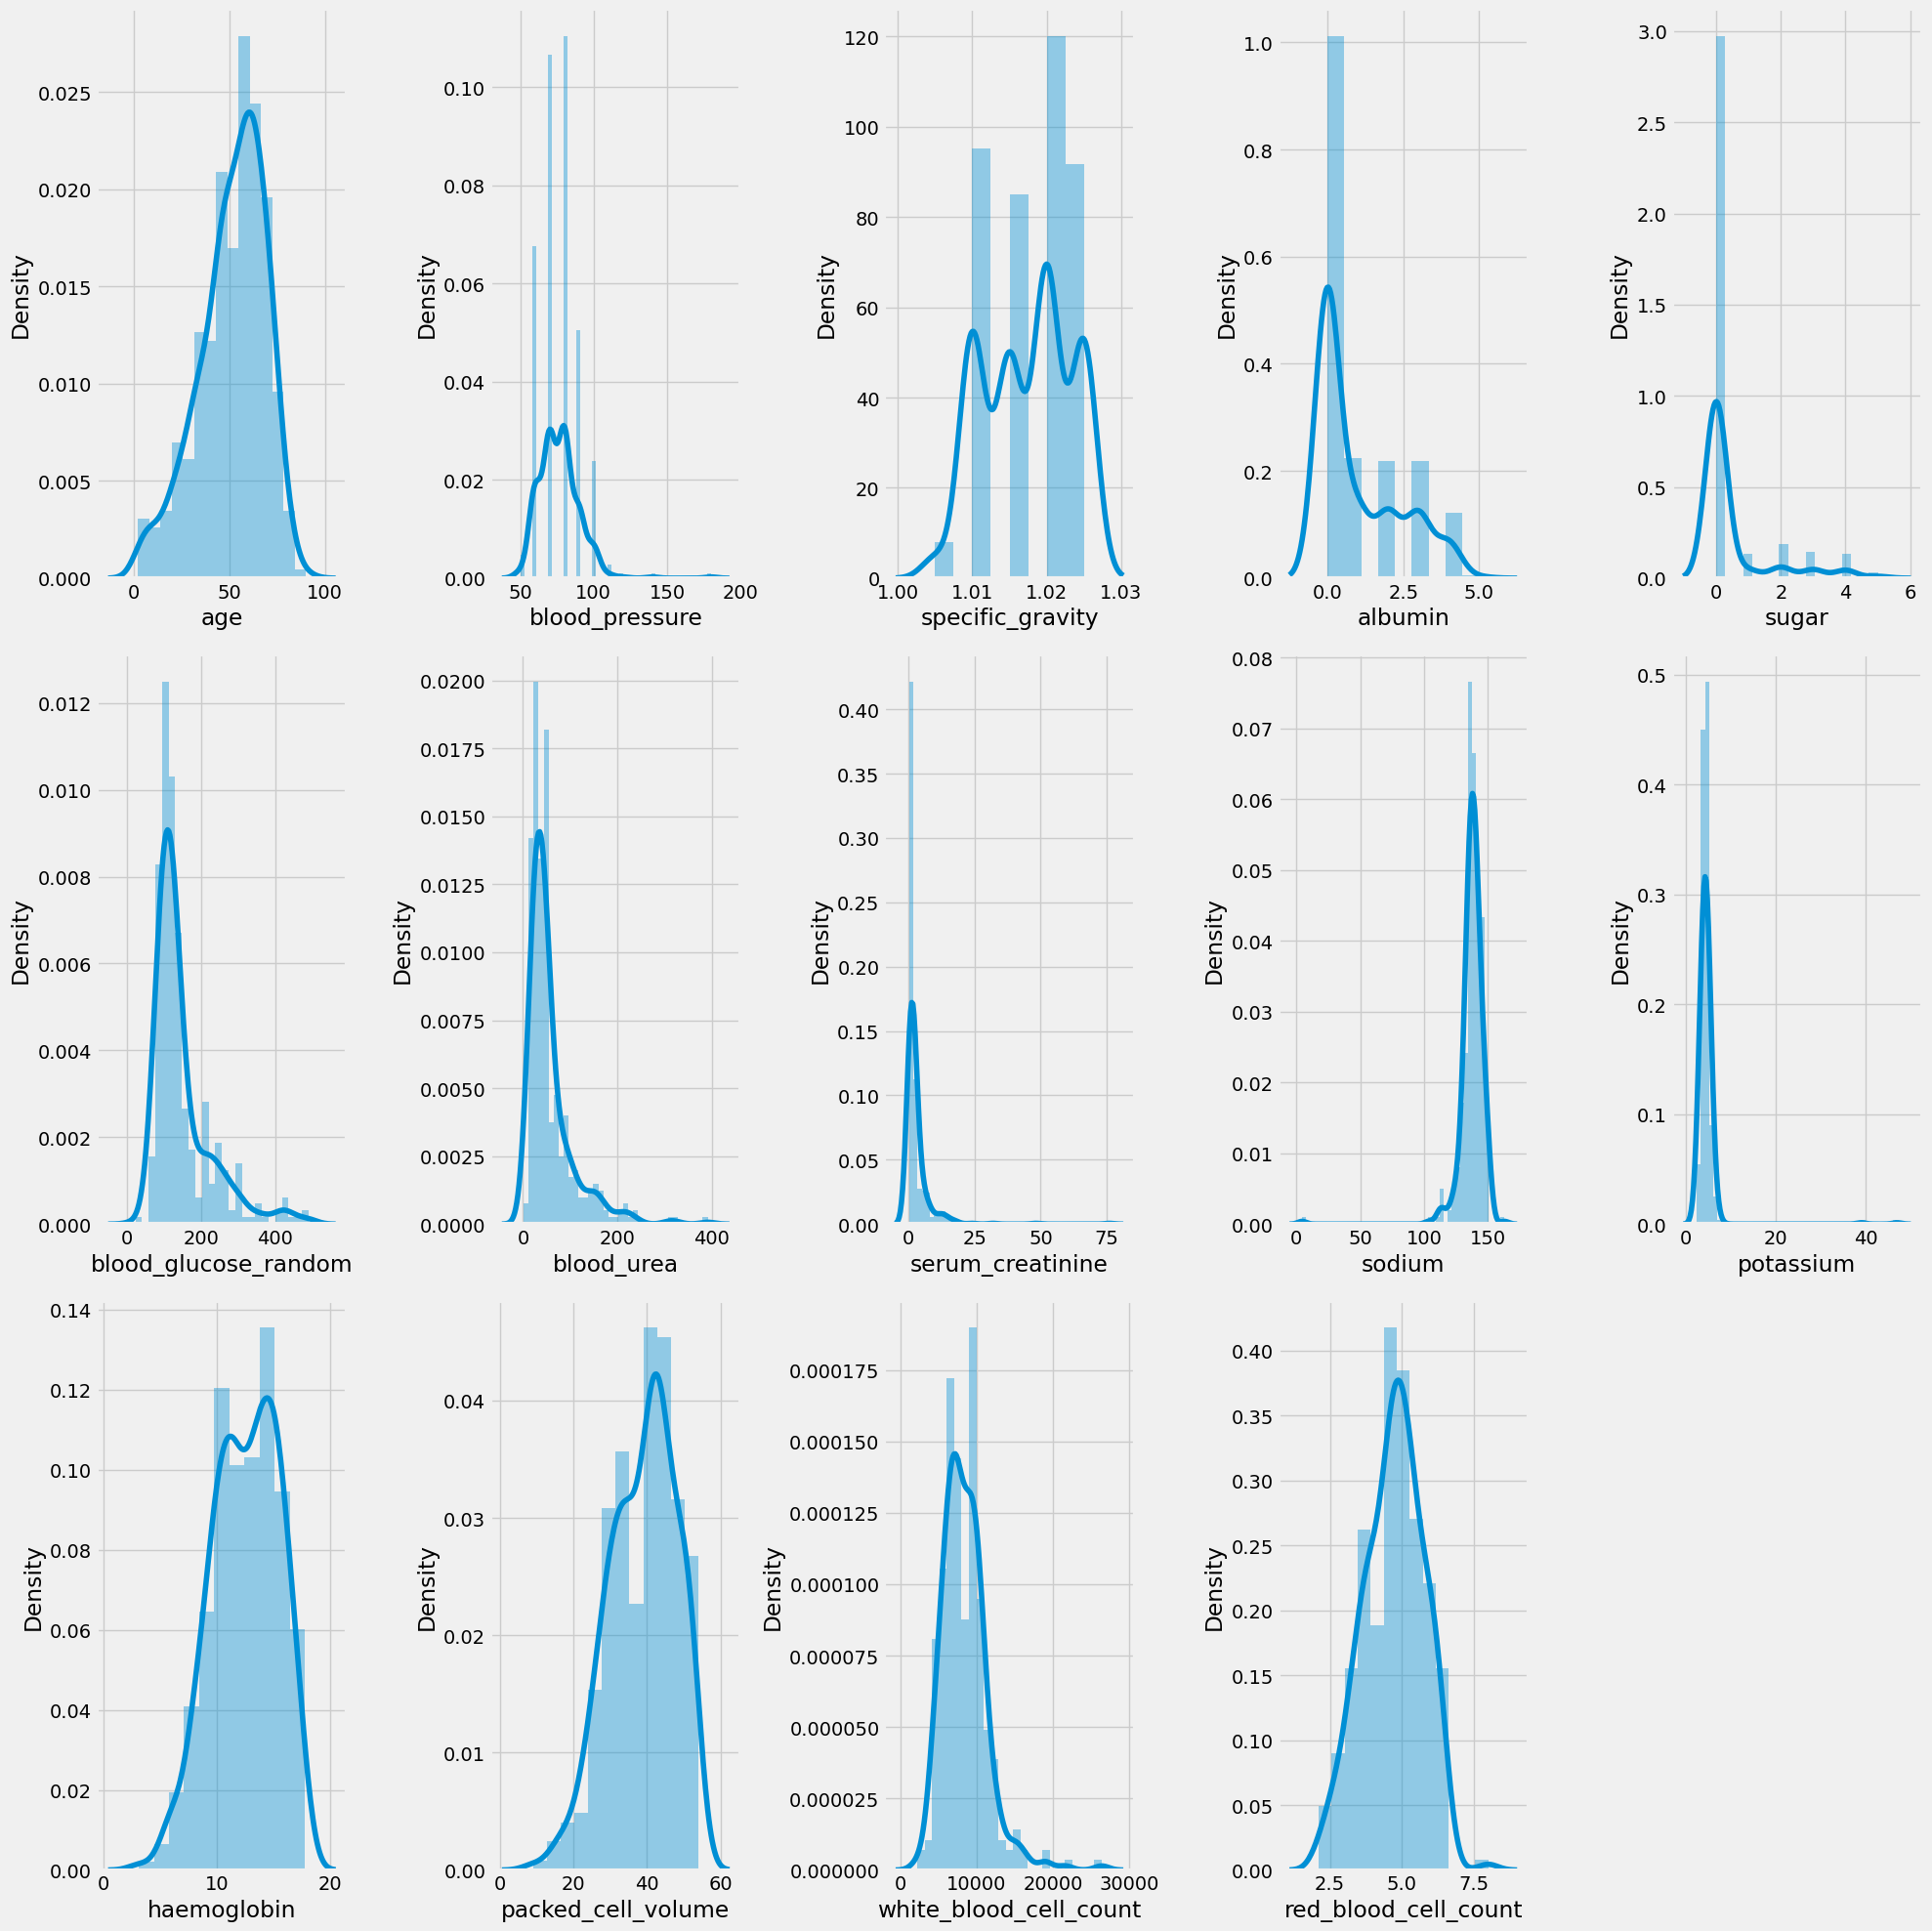

In [ ]:
plt.figure(figsize=(20,20)) #setting height width of figure
plotnum=1
for column in num_cols:
  ax=plt.subplot(3,5,plotnum) #5 colums and 3 rows for distribution of figures
  sns.distplot(df[column]) #distribution plot
  plt.xlabel(column) # adding column name as label
  plotnum+=1
plt.tight_layout()
plt.show()


**We have shown how well the data has been distributed:**


1.   Curved Line - shows the KDE (Kernel Density Estimate) Peaks show the dense values that are present.
2.   Histogram - shows the actual distribution.



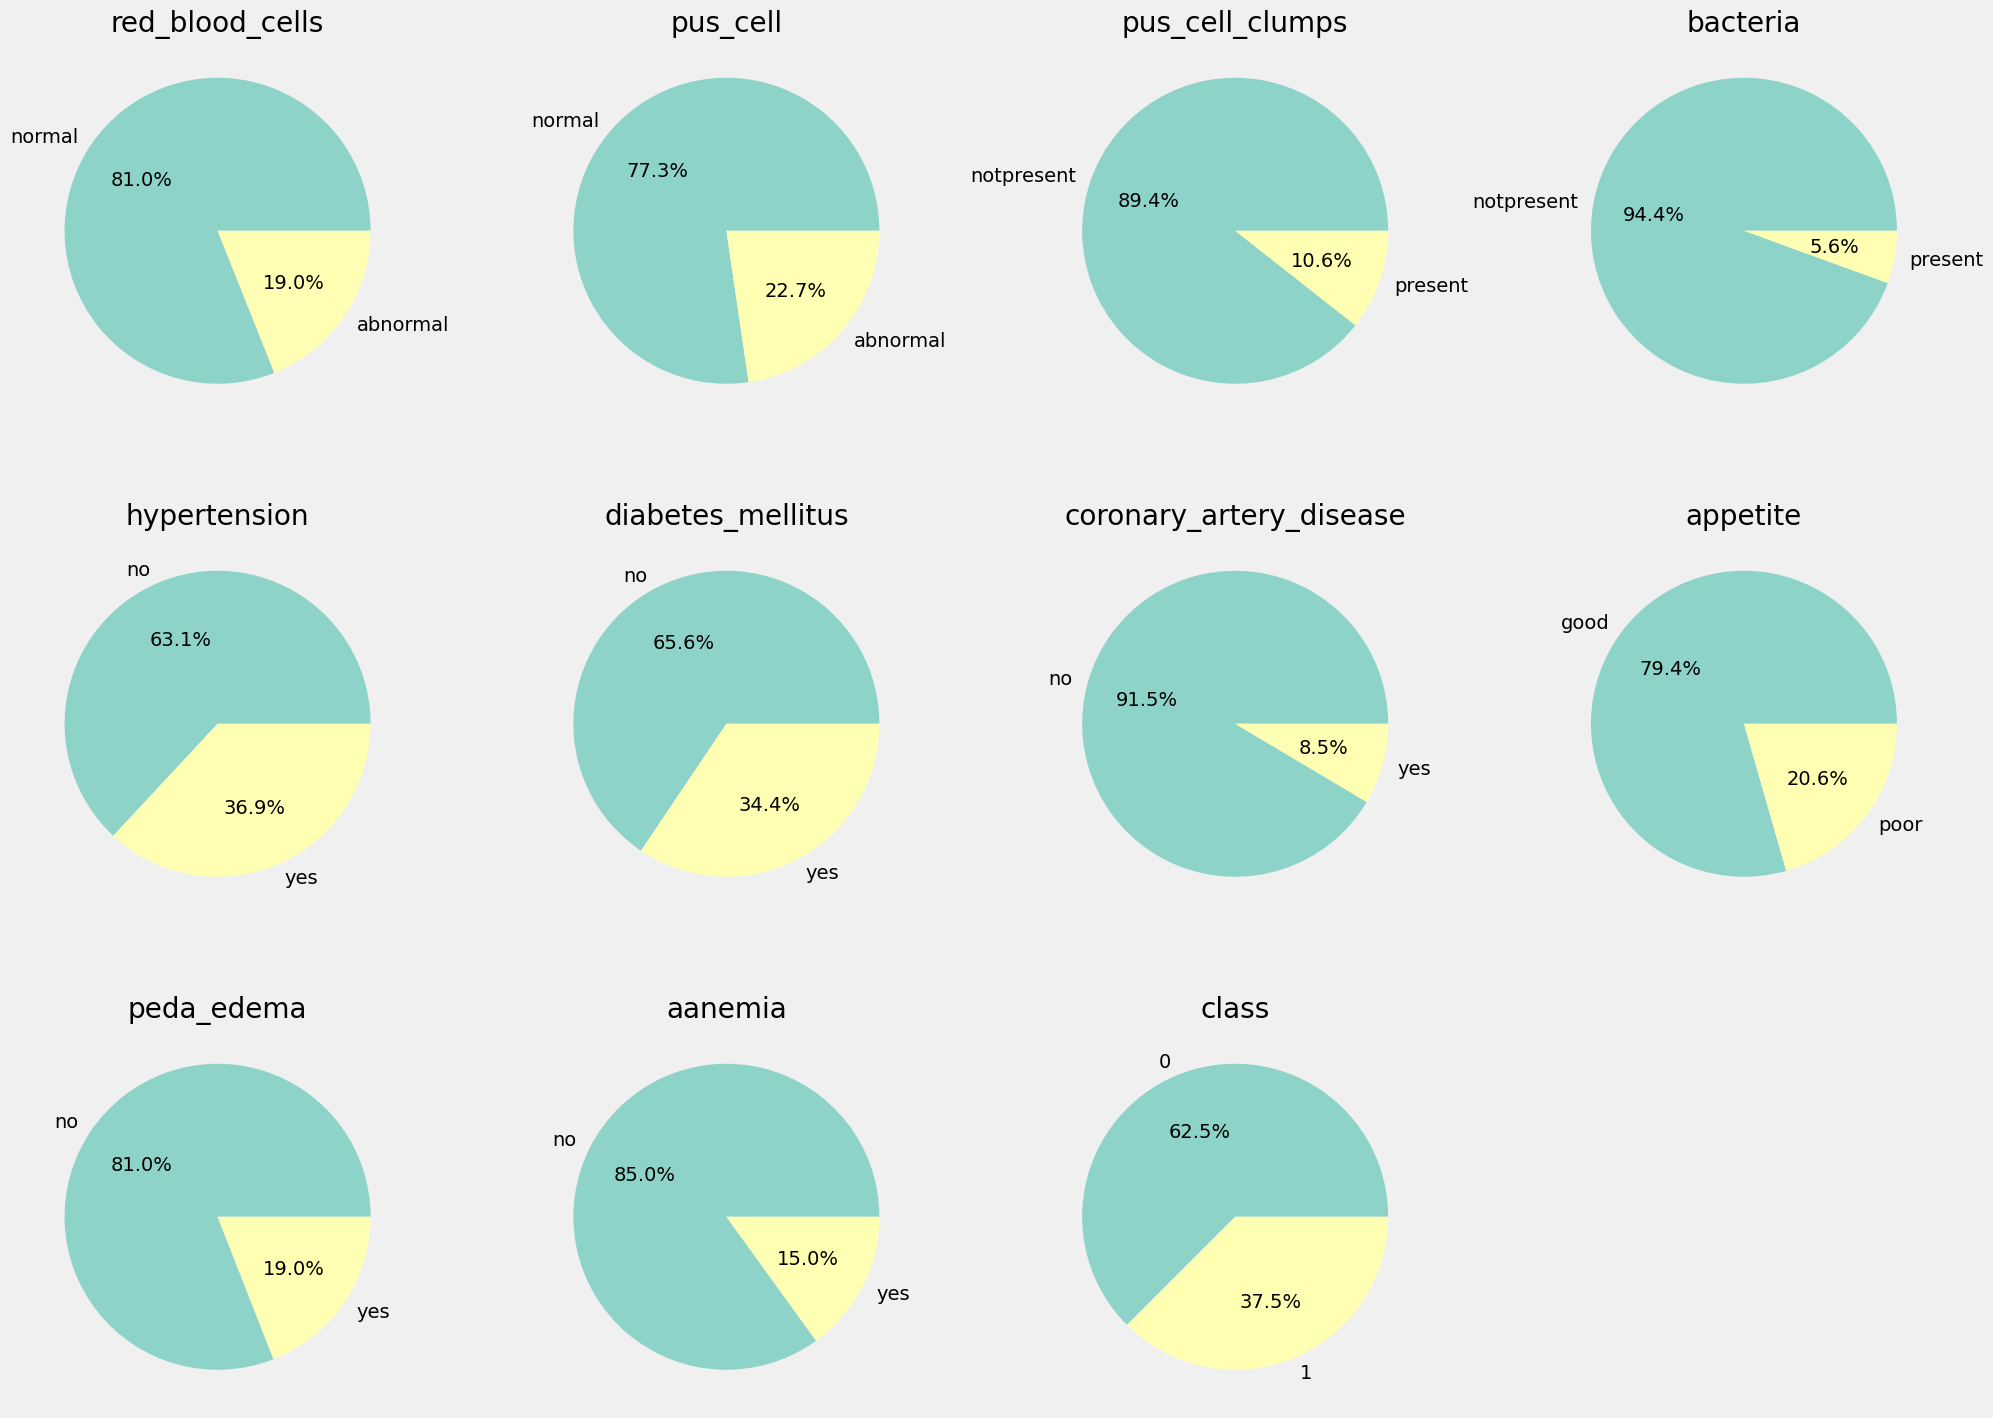

In [ ]:

plt.figure(figsize=(20, 15))  # Set figure size
plotnumber = 1

# Loop through each column in the object columns list
for c in obj_cols:
    if plotnumber <= 11:  # Limit the number of subplots
        # Convert to string type if necessary
        if df[c].dtype != 'object':
            df[c] = df[c].astype(str)

        # Calculate value counts for the pie chart
        value_counts = df[c].value_counts()

        # Define subplot grid
        ax = plt.subplot(3, 4, plotnumber)

        # Plot pie chart
        ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=plt.cm.Set3(range(len(value_counts))))
        ax.set_title(c)  # Set the title for each subplot

        plotnumber += 1  # Increment subplot index

plt.tight_layout()  # Adjust layout
plt.show()  # Display all pie charts


In [ ]:
df['class']=pd.to_numeric(df['class'],errors='coerce')
num_cols.append('class')

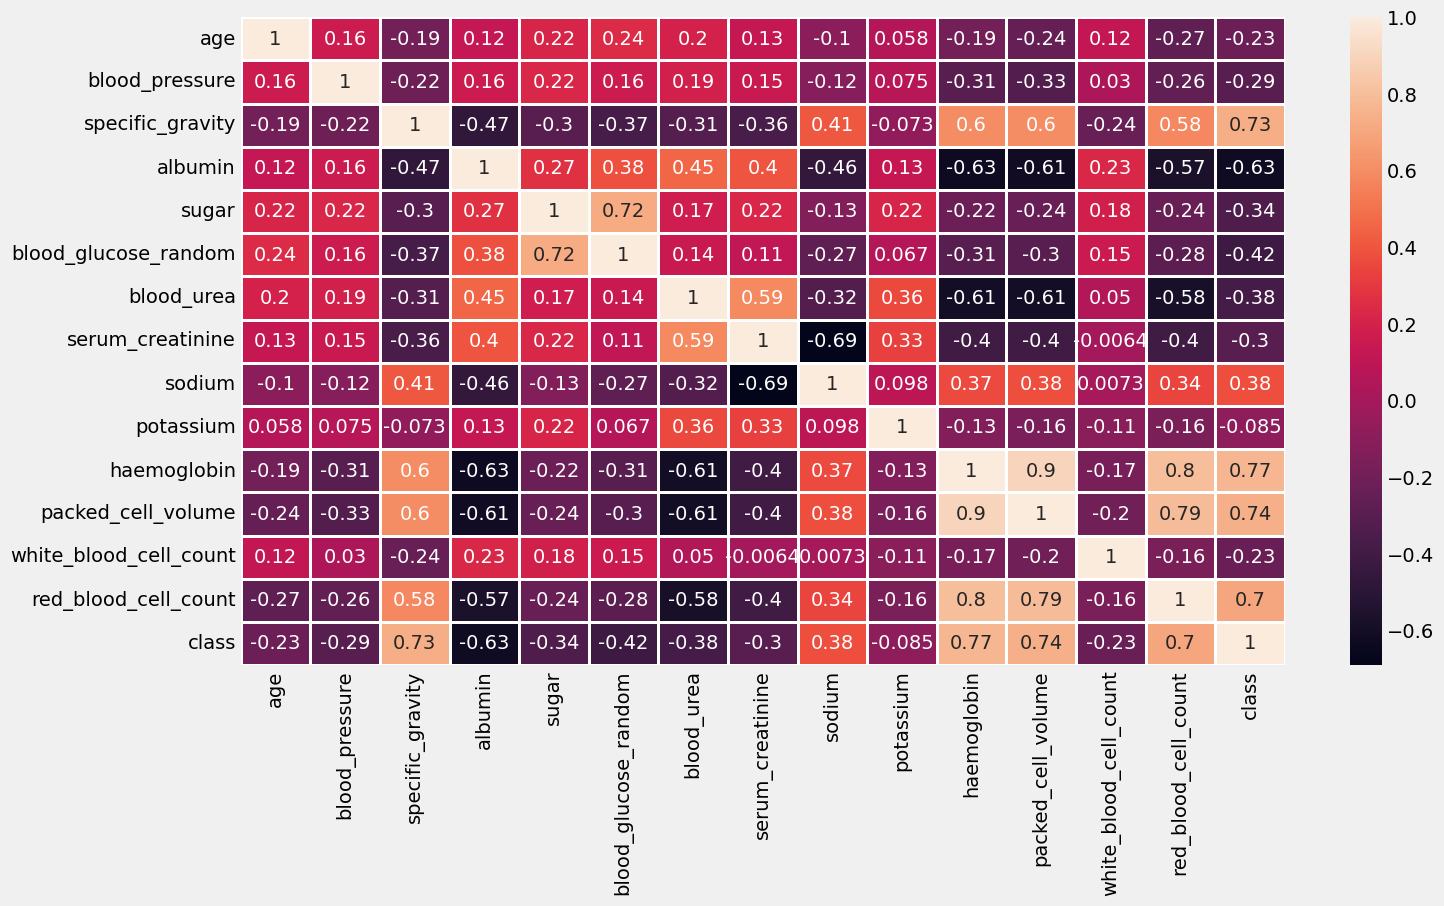

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True,linewidths=2,linecolor='white')
plt.show()

In [ ]:
def violin(col):
  fig=px.violin(df,y=col,x="class",color="class",box=True,template='presentation')
  return fig.show()


In [ ]:
def kde(col):
  grid=sns.FacetGrid(df,hue="class",height=6,aspect=2)
  grid.map(sns.kdeplot,col)
  grid.add_legend()


In [ ]:
def scatter(col1,col2):
  fig = px.scatter(df,x=col1,y=col2,color="class",template="presentation")
  return fig.show()


In [ ]:
for col in num_cols:
  violin(col)

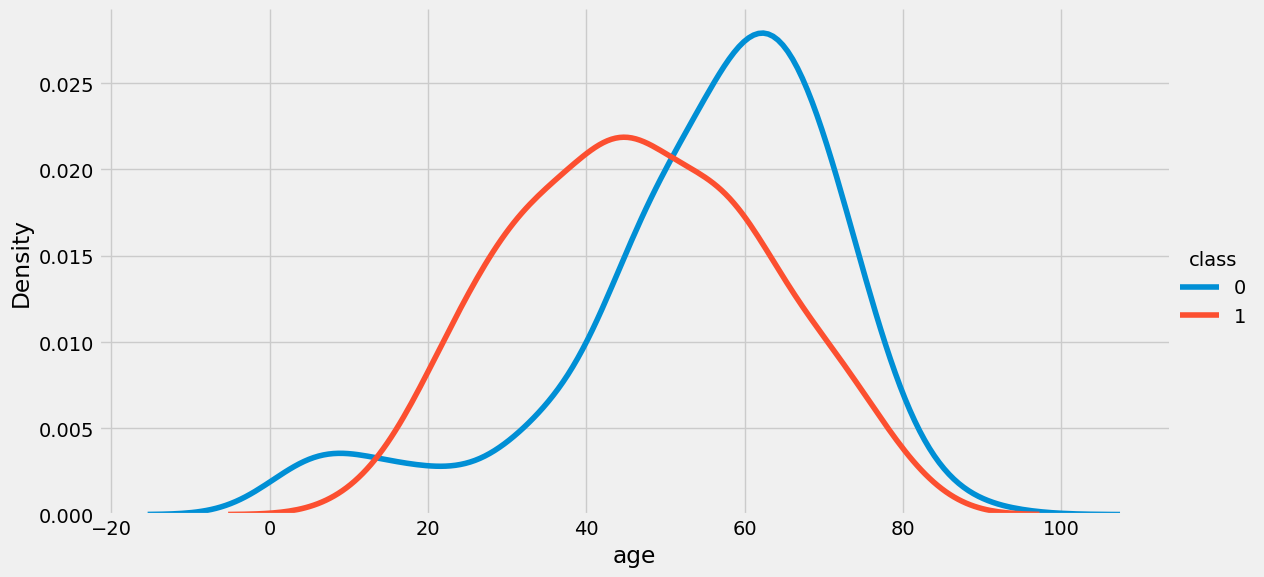

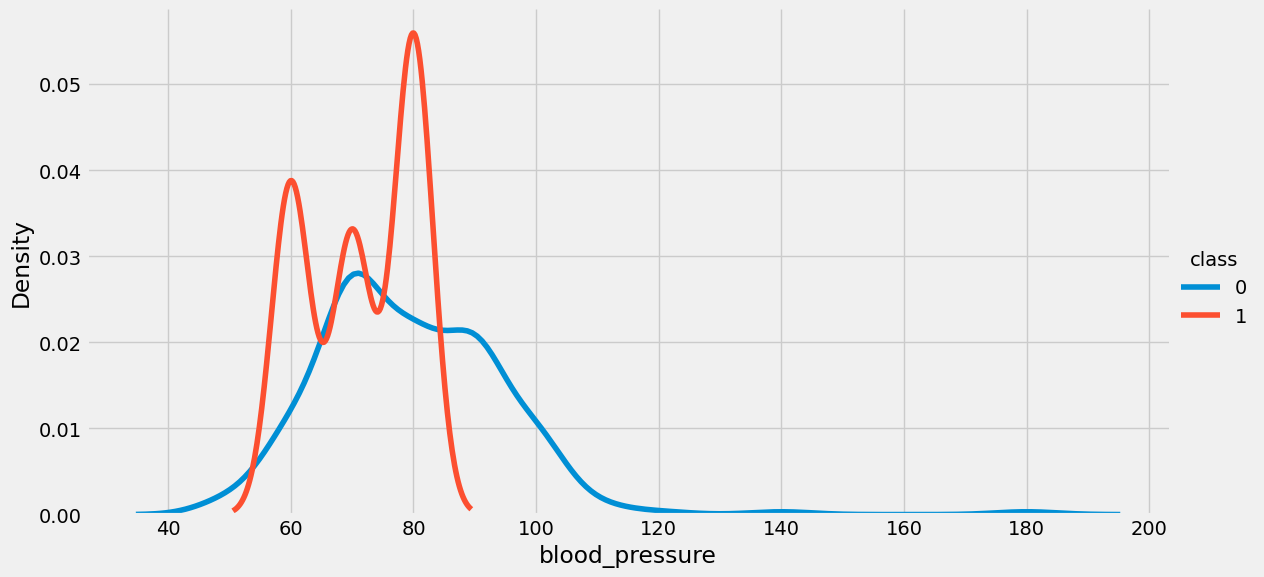

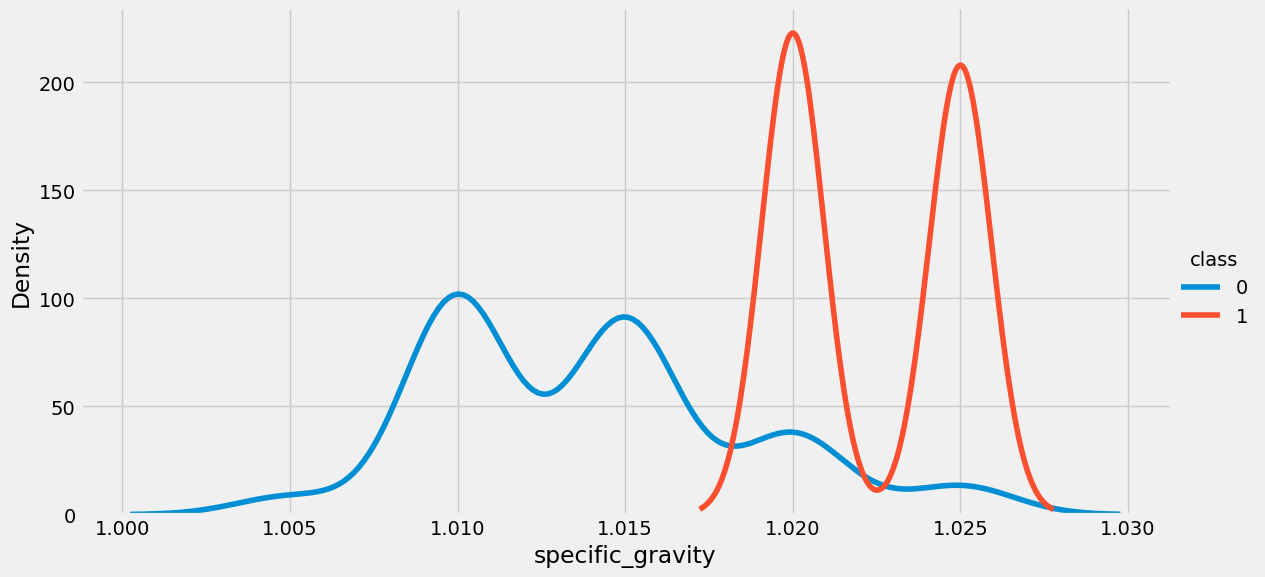

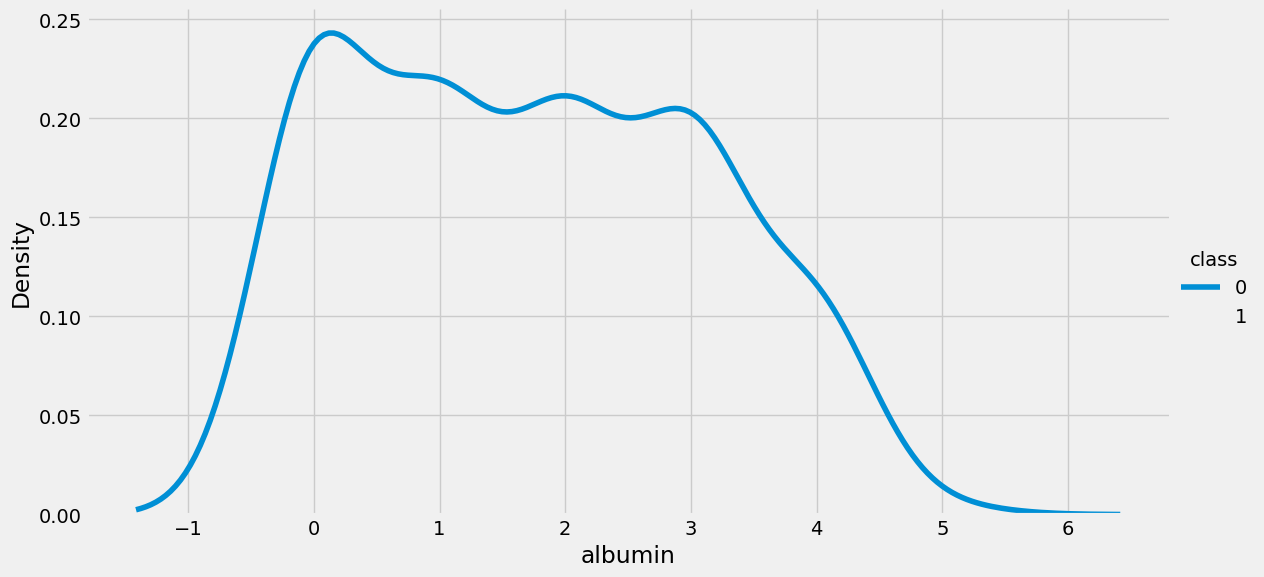

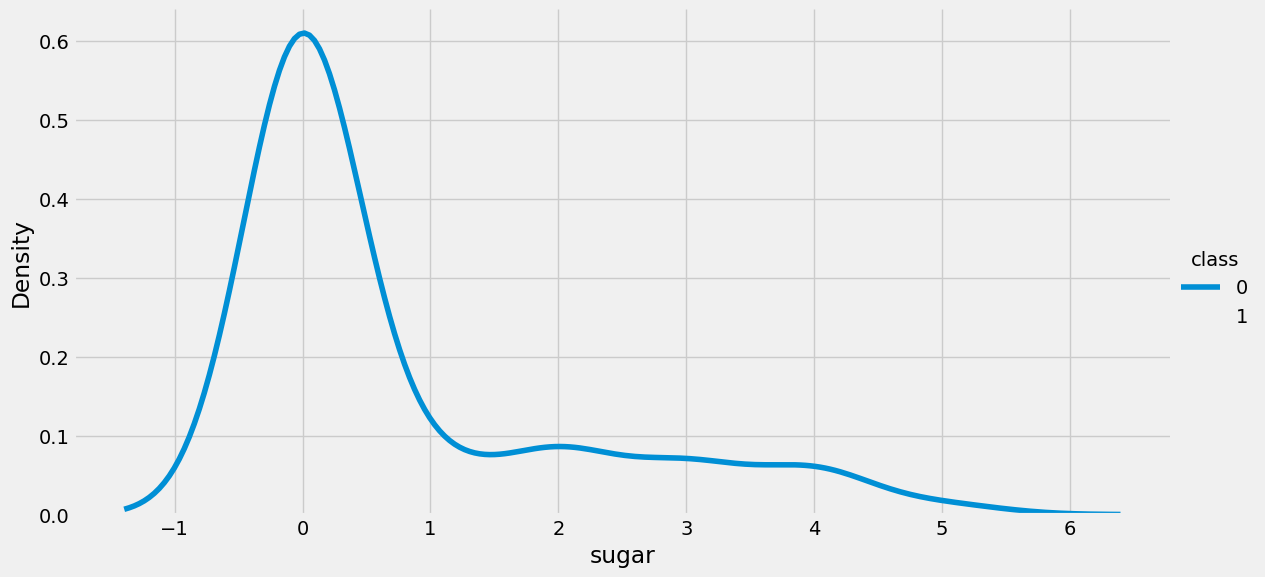

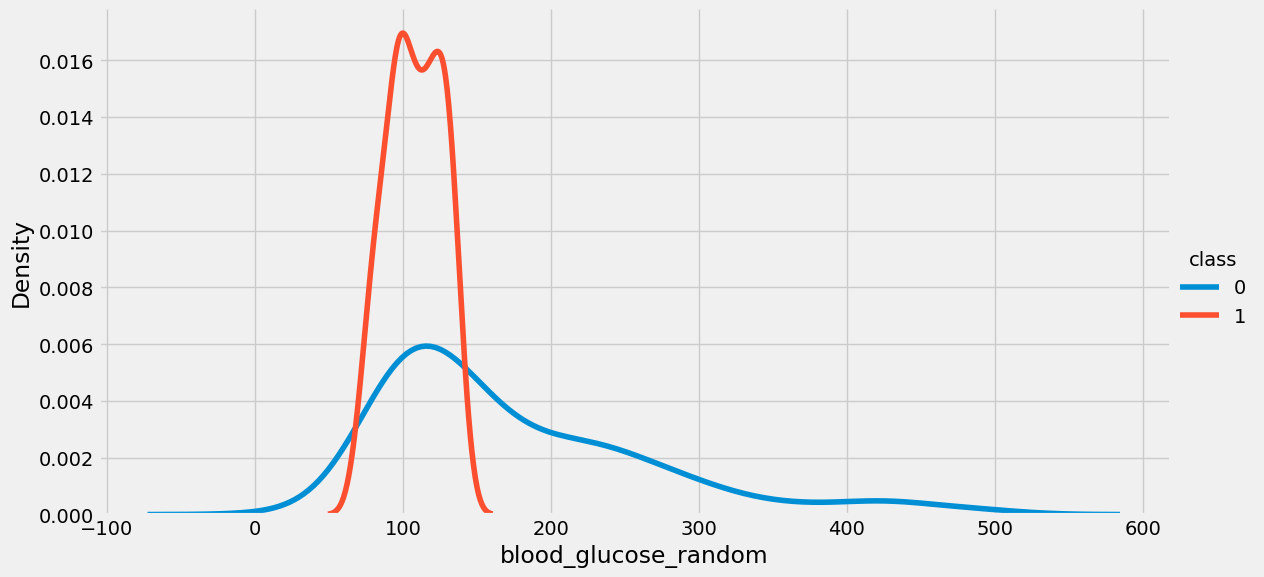

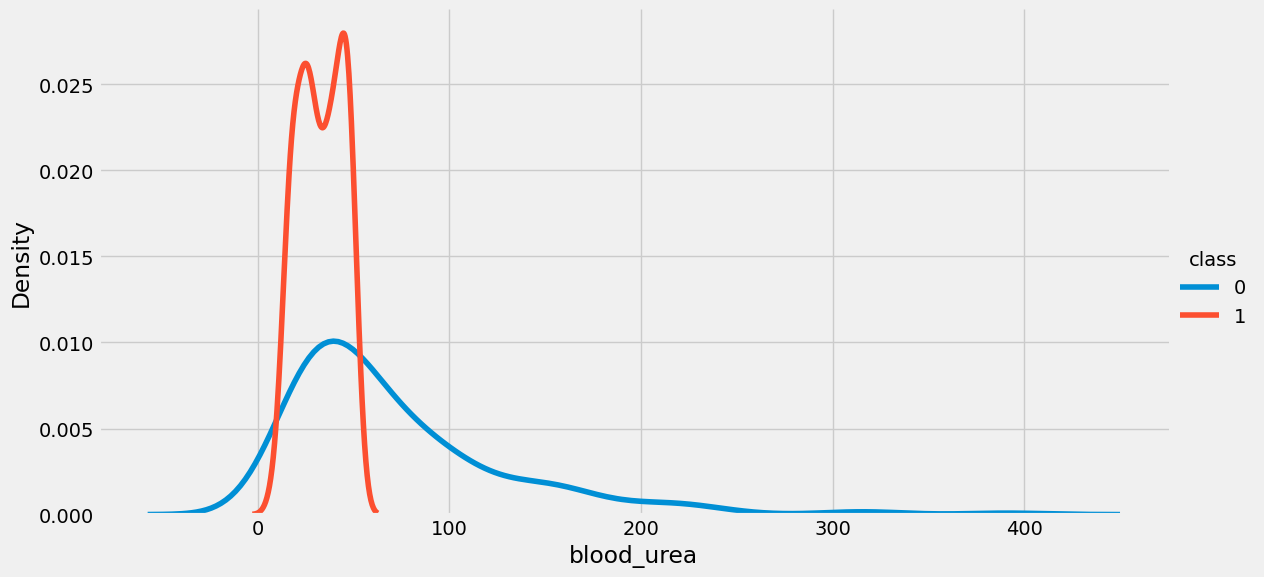

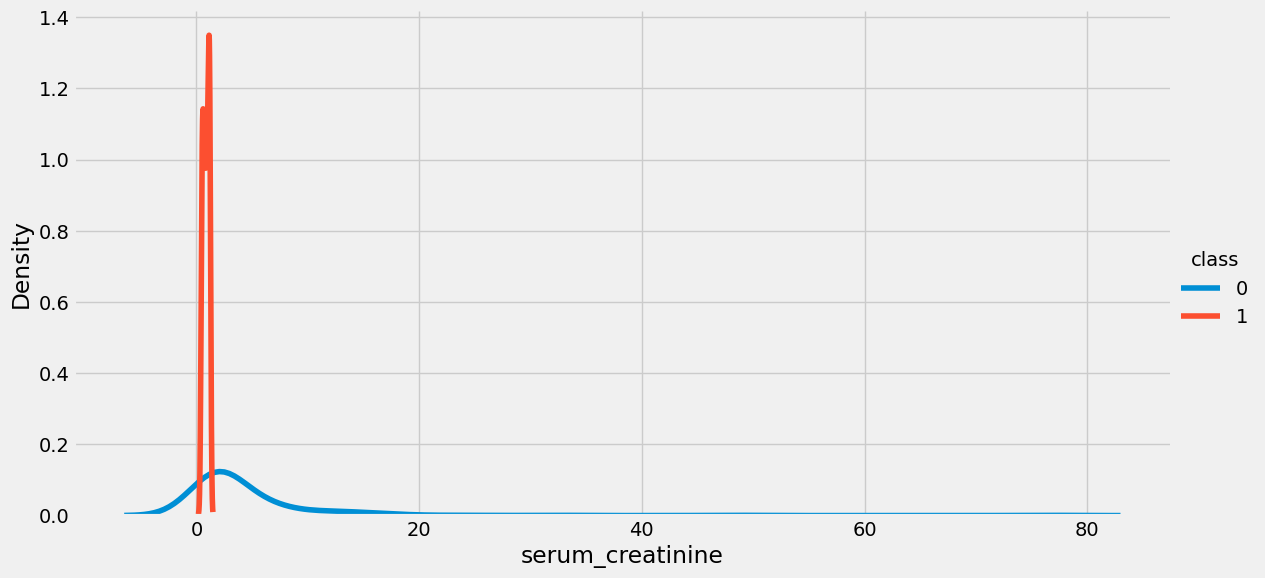

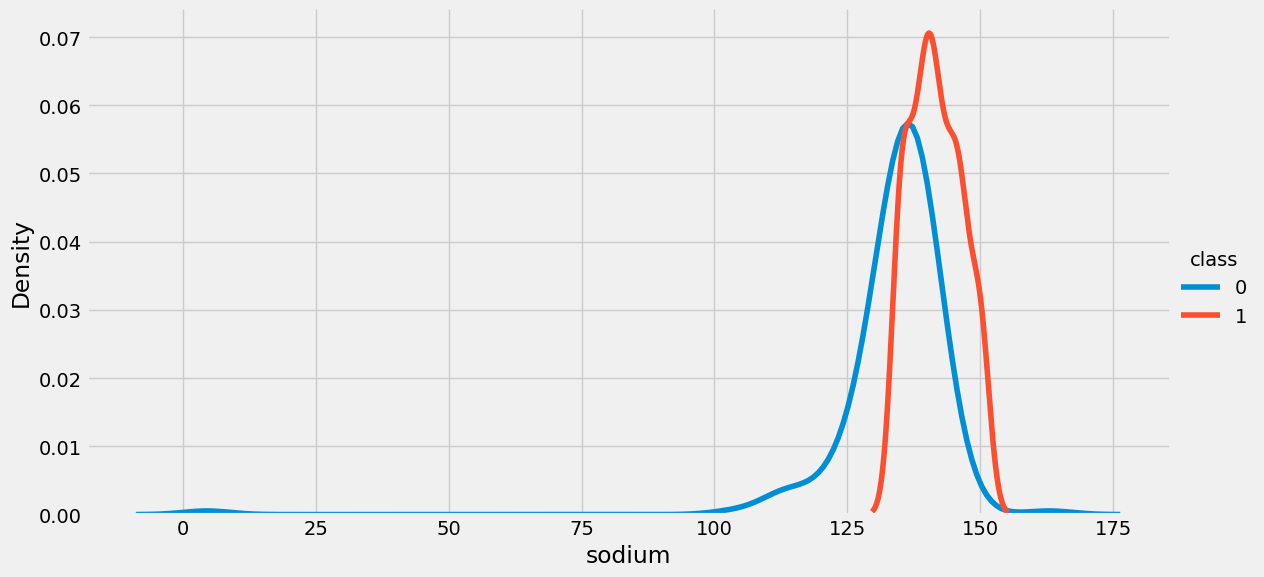

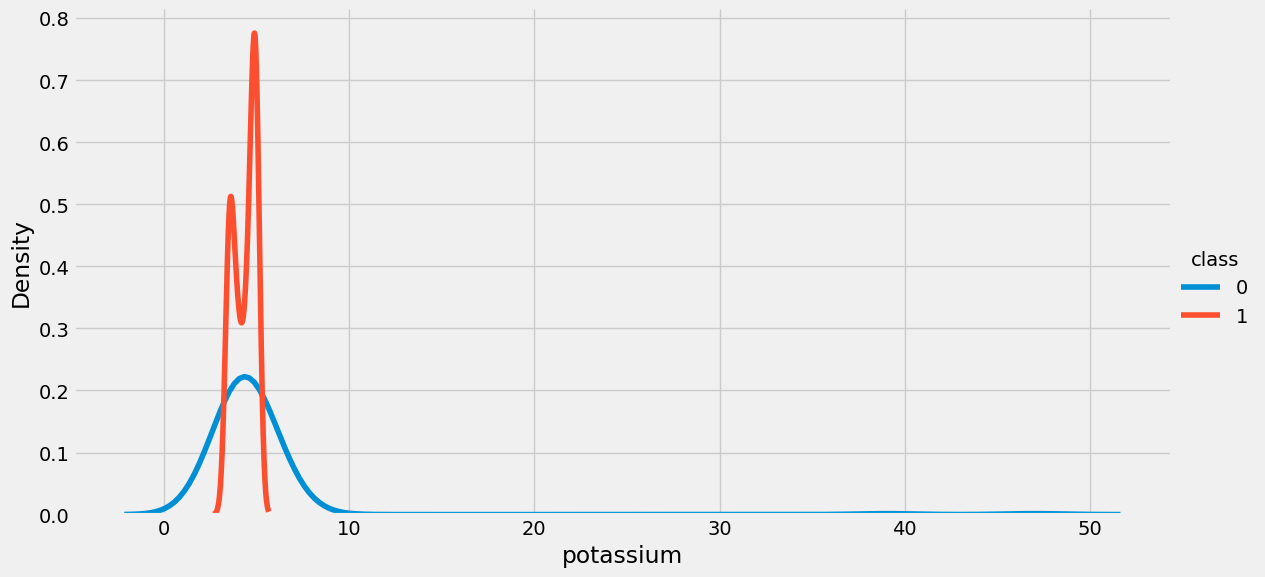

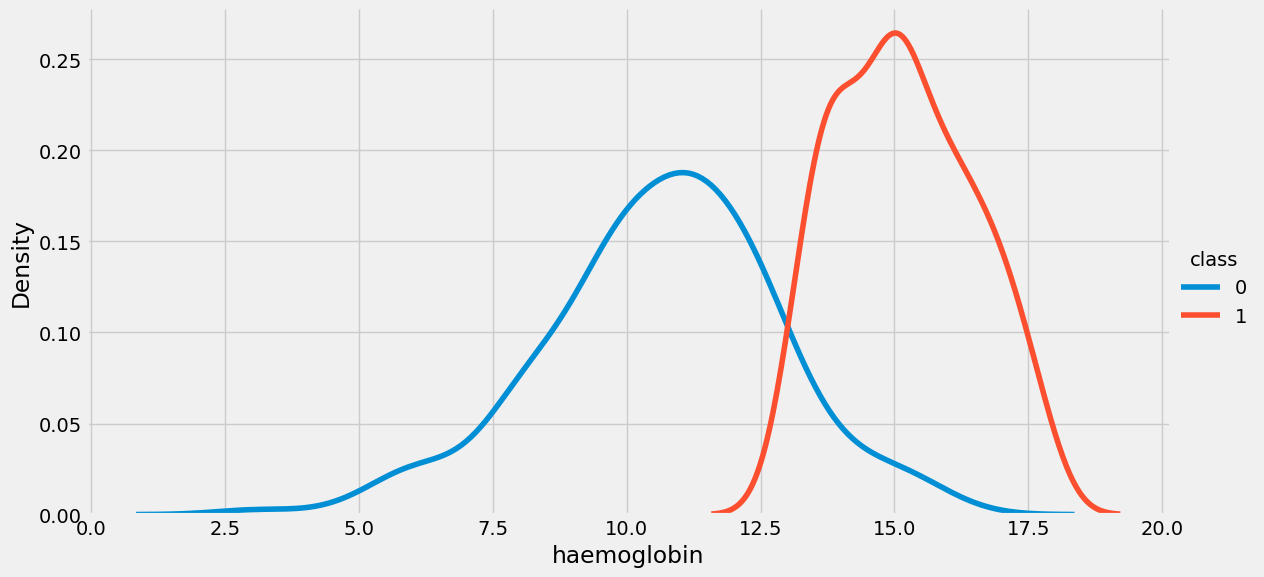

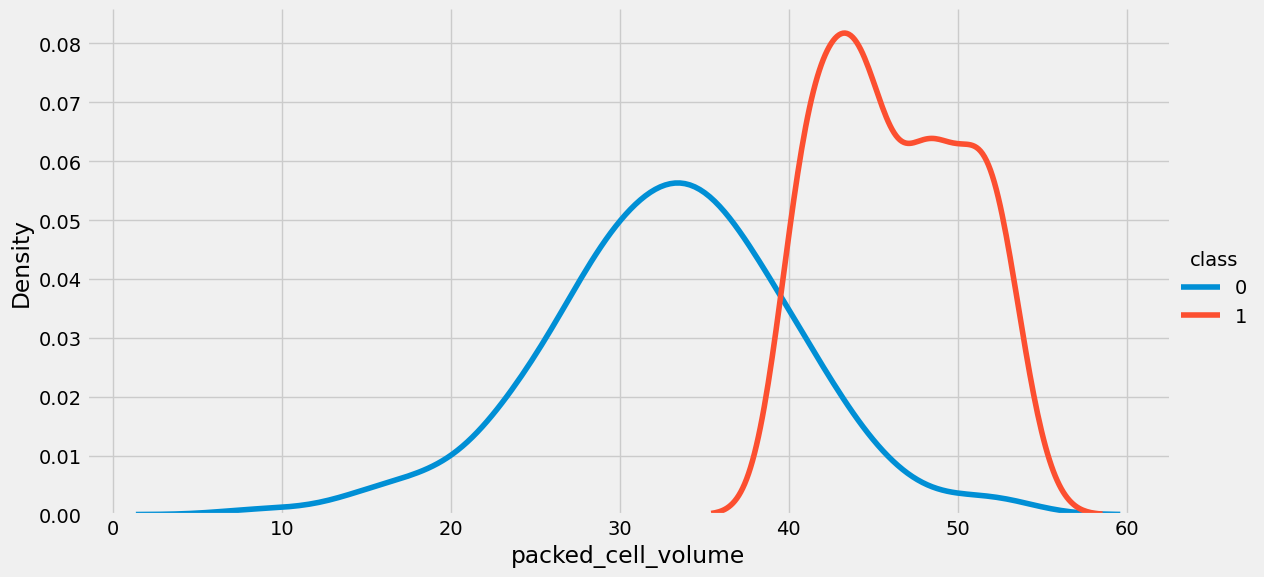

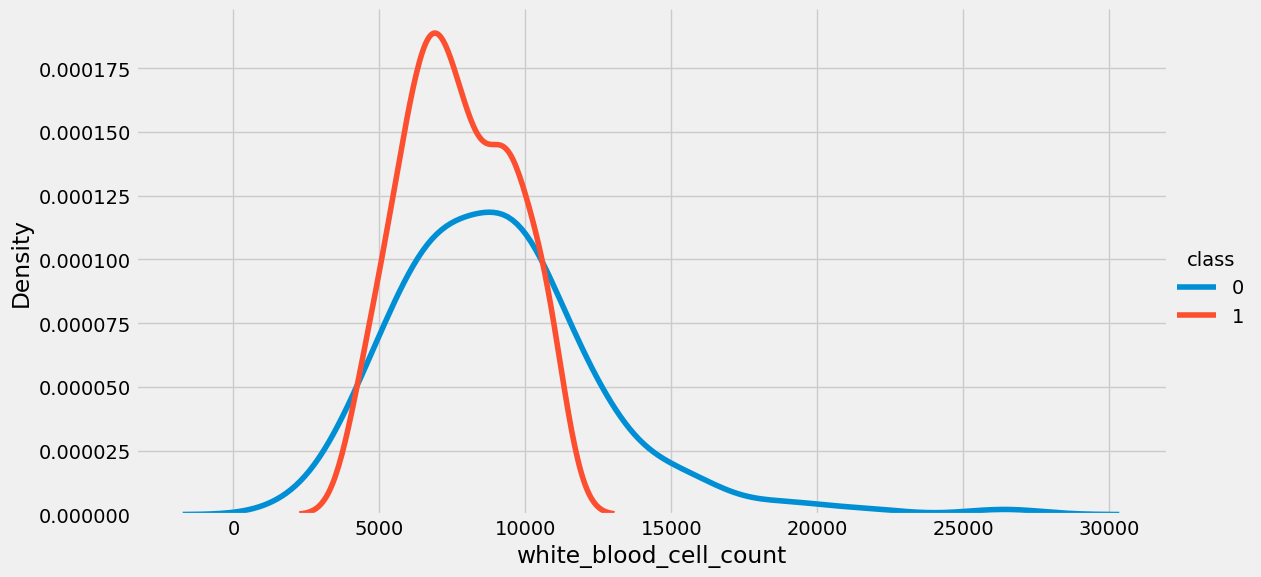

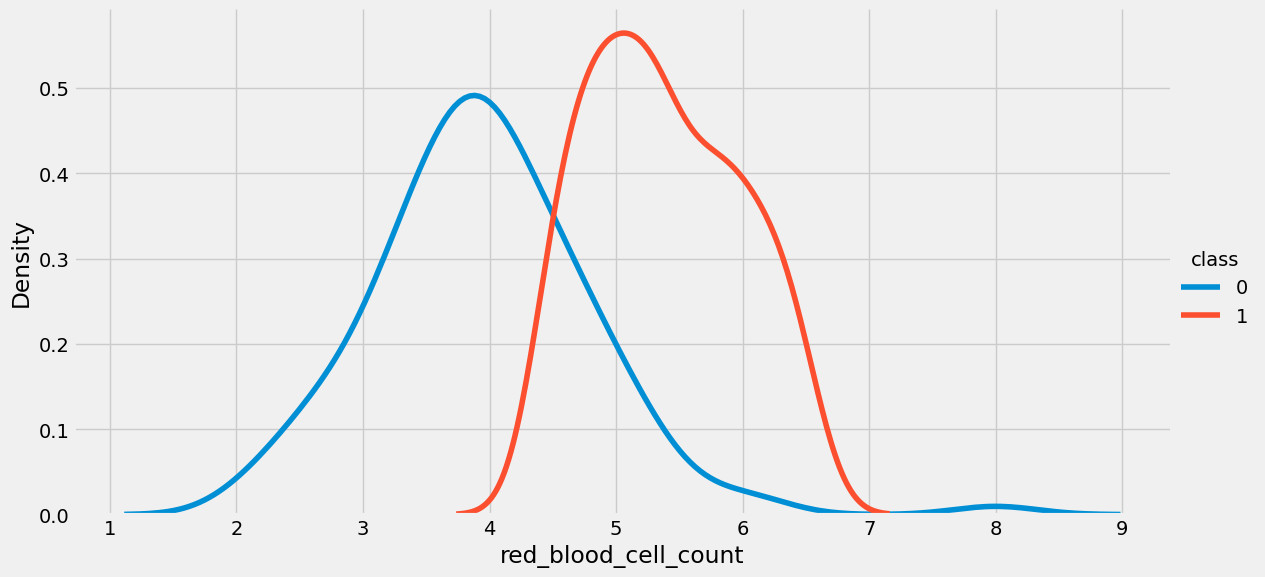

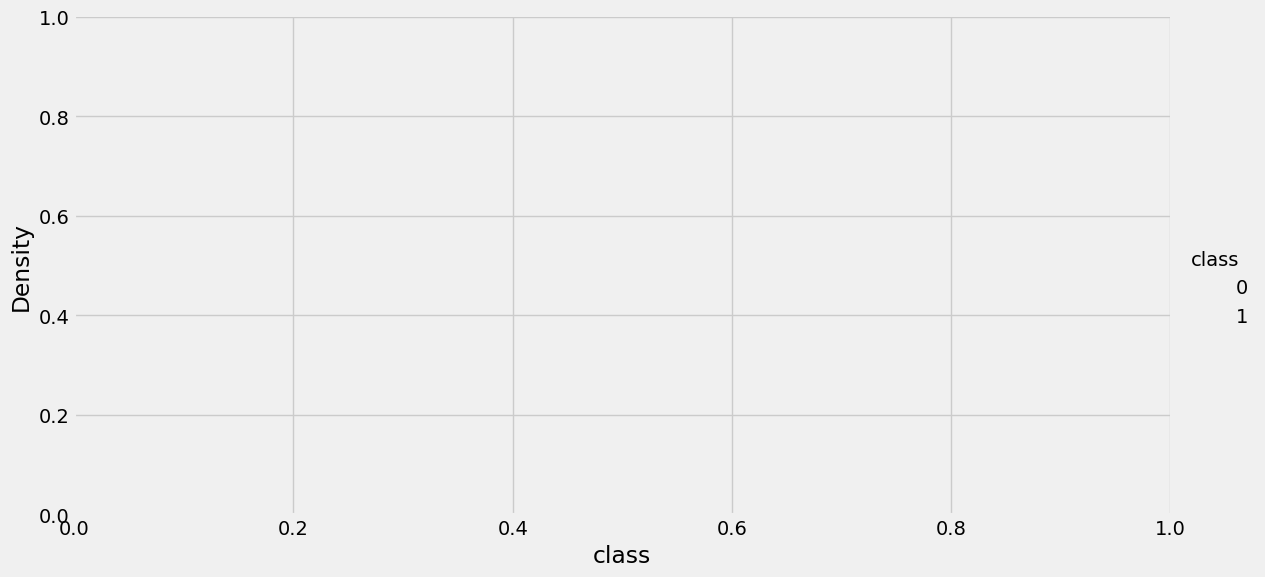

In [ ]:
for col in num_cols:
  kde(col)

In [ ]:
for i in range(0,len(num_cols)-1):
  for j in range(i+1,len(num_cols)):
    scatter(num_cols[i],num_cols[j])

In [ ]:
px.bar(df,x="blood_pressure",y="haemoglobin",color="class",barmode='group',template="presentation",height=400)

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
red_blood_cells,152
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
pus_cell,65
haemoglobin,52
sugar,49
specific_gravity,47


In [ ]:

df[num_cols].isna().sum()

,0
age,9
blood_pressure,12
specific_gravity,47
albumin,46
sugar,49
blood_glucose_random,44
blood_urea,19
serum_creatinine,17
sodium,87
potassium,88


In [ ]:
df[obj_cols].isna().sum()

,0
red_blood_cells,152
pus_cell,65
pus_cell_clumps,4
bacteria,4
hypertension,2
diabetes_mellitus,2
coronary_artery_disease,2
appetite,1
peda_edema,1
aanemia,1


In [ ]:
def random_input(col):
    ran_sample = df[col].dropna().sample(df[col].isna().sum())
    ran_sample.index = df[df[col].isnull()].index
    df.loc[df[col].isnull(),col]=ran_sample
def impute_mode(col):
    mode = df[col].mode()[0]
    df[col]=df[col].fillna(mode)
for col in num_cols:
  random_input(col)
df[num_cols].isna().sum()

,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
blood_glucose_random,0
blood_urea,0
serum_creatinine,0
sodium,0
potassium,0


In [ ]:
random_input('red_blood_cells')
random_input('pus_cell')
for col in obj_cols:
  impute_mode(col)
df[obj_cols].isna().sum()

,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
hypertension,0
diabetes_mellitus,0
coronary_artery_disease,0
appetite,0
peda_edema,0
aanemia,0


In [ ]:
for col in obj_cols:
  print(f"{col} has {len(df[col].unique())} values\n")

red_blood_cells has 2 values

pus_cell has 2 values

pus_cell_clumps has 2 values

bacteria has 2 values

hypertension has 2 values

diabetes_mellitus has 2 values

coronary_artery_disease has 2 values

appetite has 2 values

peda_edema has 2 values

aanemia has 2 values

class has 2 values



In [ ]:
from sklearn.preprocessing import LabelEncoder #encodng strings to some values
mycoder=LabelEncoder()
for col in obj_cols:
  df[col]=mycoder.fit_transform(df[col]) #fits the encoder to unique values and then transforms the values
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,36.0,1.2,137.0,3.5,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,109.0,18.0,0.8,137.0,3.5,11.3,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,141.0,5.0,9.6,31.0,7500.0,5.3,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,146.0,3.9,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [ ]:
inp_col=[]
for col in df.columns:
  if col!='class':
    inp_col.append(col) # storing independent columns in the list
out_col='class'
x=df[inp_col]
y=df[out_col]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)


In [ ]:
class LogisticRegression():
  def __init__(self,lr=0.001,num_of_iters=10000):
    self.lr=lr
    self.num_of_iters=num_of_iters
    self.w=None
    self.b=None
  def sigmoid(self,pred):
    return (1/(1+np.exp(-pred)))
  def fit(self,X,y):
    no_of_samples,n_features=X.shape
    self.w=np.zeros(n_features)
    self.b=0

    for i in range(self.num_of_iters):
      y_cap_temp=np.dot(X,self.w)+self.b
      y_cap=self.sigmoid(y_cap_temp)
      dw=(1/no_of_samples)*np.dot(X.T,(y_cap-y))
      db=(1/(no_of_samples))*np.sum(y_cap-y)
      self.w=self.w-self.lr*dw
      self.b=self.b-self.lr*db
  def predict(self,x):
    y_pred_temp=np.dot(x,self.w)+self.b
    y_pred=self.sigmoid(y_pred_temp)
    class_predict=[]
    for i in y_pred:
      if i<=0.5:
        class_predict.append(0)
      else:
        class_predict.append(1)
    return class_predict

In [ ]:
lg=LogisticRegression(lr=0.01)
lg.fit(X_train,Y_train)
predicted_y=lg.predict(x_test)
print(len(predicted_y))
print(y_test.shape)
lg_acc=np.sum(predicted_y==y_test)/len(y_test)
print("Logistic Regression- Accuracy:",lg_acc)

120
(120,)
Logistic Regression- Accuracy: 0.6


In [ ]:
class Node():
  def __init__(self,feature_index=None,threshold=None,left=None,right=None,ig=None,value=None):
    self.feature_index=feature_index
    self.threshold=threshold
    self.left=left
    self.right=right
    self.ig=ig
    self.value=value


In [ ]:

from sklearn.metrics import accuracy_score

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, ig=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.ig = ig
        self.value = value

class DecisionTree:
    def __init__(self, min_split=2, max_depth=2):
        self.root = None
        self.min_split = min_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        X, y = dataset[:, :-1], dataset[:, -1]
        num_samples, num_features = np.shape(X)
        if num_samples >= self.min_split and curr_depth <= self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split and best_split["ig"] > 0:
                left_subtree = self.build_tree(best_split["left"], curr_depth + 1)
                right_subtree = self.build_tree(best_split["right"], curr_depth + 1)
                return Node(best_split["feature_index"], best_split["threshold"], left_subtree, right_subtree, best_split["ig"])
        leaf_value = self.calculate_l_v(y)
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {}
        max_ig = -float("inf")
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                left, right = self.split(dataset, feature_index, threshold)
                if len(left) > 0 and len(right) > 0:
                    parent_y, left_y, right_y = dataset[:, -1], left[:, -1], right[:, -1]
                    curr_ig = self.info_gain(parent_y, left_y, right_y, "gini")
                    if curr_ig > max_ig:
                        best_split = {
                            "feature_index": feature_index,
                            "threshold": threshold,
                            "left": left,
                            "right": right,
                            "ig": curr_ig
                        }
                        max_ig = curr_ig
        return best_split

    def split(self, dataset, feature_index, threshold):
        left = np.array([row for row in dataset if row[feature_index] <= threshold])
        right = np.array([row for row in dataset if row[feature_index] > threshold])
        return left, right

    def info_gain(self, parent, left, right, mode="entropy"):
        weight_of_l = len(left) / len(parent)
        weight_of_r = len(right) / len(parent)
        if mode == "gini":
            gain = self.gini(parent) - (weight_of_l * self.gini(left) + weight_of_r * self.gini(right))
        else:
            gain = self.entropy(parent) - (weight_of_l * self.entropy(left) + weight_of_r * self.entropy(right))
        return gain

    def entropy(self, y):
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy -= p_cls * np.log2(p_cls)
        return entropy

    def gini(self, y):
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls ** 2
        return 1 - gini

    def calculate_l_v(self, y):
        y = list(y)
        return max(y, key=y.count)

    def fit(self, X, Y):
        Y = Y.reshape(-1, 1)  # Correct reshaping
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        predictions = [self.make_prediction(x, self.root) for x in X]
        #print(f"Predictions made: {len(predictions)}, Expected: {len(X)}")  # Debug statement
        return predictions

    def make_prediction(self, x, tree):
        if tree.value is not None:
            return tree.value
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            if tree.left is not None:
                return self.make_prediction(x, tree.left)
            else:
                print("Warning: Left subtree is None")
        else:
            if tree.right is not None:
                return self.make_prediction(x, tree.right)
            else:
                print("Warning: Right subtree is None")
        return None  # Return None if subtree is missing

In [ ]:

dc_tree=DecisionTree(min_split=3,max_depth=3)
temp_X=df.iloc[:,:-1].values
temp_Y=df.iloc[:,-1].values.reshape(-1,1)


X_train, X_test, Y_train, Y_test = train_test_split(temp_X, temp_Y, test_size=.3, random_state=0)
dc_tree.fit(X_train,Y_train)
predicted_y=dc_tree.predict(X_test)
from sklearn.metrics import accuracy_score
dc_acc=accuracy_score(Y_test,predicted_y)
dc_acc

0.9583333333333334

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.3, random_state=0)


In [ ]:
rf=RandomForestClassifier(criterion='entropy',max_depth=11,max_features='sqrt',min_samples_leaf=2,min_samples_split=3,n_estimators=130)
rf.fit(X_train,Y_train)
rf_predicted_y=rf.predict(X_test)
rf_acc=accuracy_score(Y_test,rf_predicted_y)
print(f"Random Forest Accuracy:{rf_acc}")

Random Forest Accuracy:0.9666666666666667


In [ ]:
!pip install catboost

In [ ]:

from catboost import CatBoostClassifier
cat=CatBoostClassifier(iterations=20)
cat.fit(X_train,Y_train)
cat_predicted_y=cat.predict(X_test)
cat_acc=accuracy_score(Y_test,cat_predicted_y)
print(f"CatBoost Accuracy:{cat_acc}")

Learning rate set to 0.216185
0:	learn: 0.4422324	total: 2.78ms	remaining: 52.8ms
1:	learn: 0.2989689	total: 4.81ms	remaining: 43.3ms
2:	learn: 0.2093175	total: 6.8ms	remaining: 38.6ms
3:	learn: 0.1598713	total: 8.76ms	remaining: 35.1ms
4:	learn: 0.1203489	total: 12.1ms	remaining: 36.3ms
5:	learn: 0.1005831	total: 15.1ms	remaining: 35.3ms
6:	learn: 0.0821974	total: 18.5ms	remaining: 34.4ms
7:	learn: 0.0649233	total: 21.1ms	remaining: 31.6ms
8:	learn: 0.0531394	total: 23.4ms	remaining: 28.6ms
9:	learn: 0.0431838	total: 26.2ms	remaining: 26.2ms
10:	learn: 0.0387383	total: 29.5ms	remaining: 24.1ms
11:	learn: 0.0347641	total: 31.7ms	remaining: 21.1ms
12:	learn: 0.0297329	total: 34.5ms	remaining: 18.6ms
13:	learn: 0.0263345	total: 36.7ms	remaining: 15.7ms
14:	learn: 0.0234023	total: 38.7ms	remaining: 12.9ms
15:	learn: 0.0217398	total: 40.6ms	remaining: 10.2ms
16:	learn: 0.0202934	total: 42.6ms	remaining: 7.51ms
17:	learn: 0.0186058	total: 44.5ms	remaining: 4.94ms
18:	learn: 0.0172357	total:

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, Y_train)

xgb_acc = accuracy_score(Y_test, xgb.predict(X_test))
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

Test Accuracy of XgBoost is 0.9666666666666667 



In [ ]:
tot_models=pd.DataFrame({
    'Model':['Logistic_Regression','Decision Tree Classifier','Random Forest Classifier','CatBoost Classsifier','XgBoost'],
    'Accuracy':[lg_acc,dc_acc,rf_acc,cat_acc,xgb_acc]
})
tot_models.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
3,CatBoost Classsifier,0.975000
2,Random Forest Classifier,0.966667
4,XgBoost,0.966667
1,Decision Tree Classifier,0.958333
0,Logistic_Regression,0.600000


In [ ]:
px.bar(data_frame = tot_models, x = 'Accuracy', y = 'Model', color = 'Accuracy', template = 'plotly_white',
       title = 'Models Comparison')